## Quamnet Tables Download

In [20]:
from selenium import webdriver
import pandas as pd
import time
import numpy as np
from IPython.core.display import HTML
import requests
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt
from math import pi

In [2]:
# get the path of ChromeDriverServer 
chrome_driver_path = "C:\Program Files\R\chromedriver.exe"

In [3]:
browser = webdriver.Chrome(chrome_driver_path)

In [4]:
#to obtain a list of HSI stock codes
HSI_page = requests.get('https://warrants-hk.credit-suisse.com/en/underlying/hsi_e.cgi')
HSI_content = HSI_page.text
HSI_content = HSI_content.split('<a href="/en/underlying/underlying_info_e.cgi?code=')
HSI_content = HSI_content[1:]
HSI_content[:2]

['00001&amp;wtype=warrant">00001</a></td>\t\n\t<td class="text">CKH HOLDINGS</td>\n\t<td class="text h-align-right">72.050</td>\t\n\t<td class="text h-align-right">133,015</td>\n\t<td class="text h-align-right">\n\t\t&nbsp; \n\t</td>\n\t<td class="text">\n\t\t<img src="/home/img/barchart_l_b.gif" width="3" height="15" />0.209%\n\t</td>\n</tr>\n<tr>\n\t<td class="even">',
 '00002&amp;wtype=warrant">00002</a></td>\t\n\t<td class="even">CLP HOLDINGS</td>\n\t<td class="even h-align-right">82.300</td>\t\n\t<td class="even h-align-right">123,479</td>\n\t<td class="even h-align-right">\n\t\t&nbsp; \n\t</td>\n\t<td class="even">\n\t\t<img src="/home/img/barchart_l_b.gif" width="11" height="15" />0.673%\n\t</td>\n</tr>\n<tr>\n\t<td class="text">']

In [5]:
#HSI_code contains the stock codes
HSI_content = [x.split('>') for x in HSI_content]
HSI_code = [x[1] for x in HSI_content]
HSI_Cname = [x[4] for x in HSI_content]
HSI_code = [x.split('<') for x in HSI_code]
HSI_code = [str(x[0][1:]) for x in HSI_code]
HSI_code[:5]

['0001', '0002', '0003', '0005', '0006']

In [6]:
#HSI_Cname contains the company names
HSI_Cname = [x.split('<') for x in HSI_Cname]
HSI_Cname = [str(x[0]) for x in HSI_Cname]
HSI_Cname[:5]

['CKH HOLDINGS',
 'CLP HOLDINGS',
 'HK & CHINA GAS',
 'HSBC HOLDINGS',
 'POWER ASSETS']

In [9]:
# a function to give a dictionary of a table
def re_define(x,names,cname,code):
    y = defaultdict(dict)
    y[names[0]] = {"value": float(x[0][:-1].replace(',','')), "unit":x[0][-1]}
    x[1] = x[1].split("/")
    y[names[1]] = {"high": float(x[1][0]), "low": float(x[1][1])}
    y[names[2]] = {"value":float(x[2].replace(',',''))}
    x[3] = x[3].split("/")
    y[names[3]] = {"high": float(x[3][0]), "low": float(x[3][1])}
    x[4] = x[4].split("/")
    y[names[4]] = {"bid": float(x[4][0]), "ask": float(x[4][1])}
    y[names[5]] = {"value": float(x[5][:-1]), "unit":x[5][-1]}
    try:
        y[names[6]] = {"value":float(x[6])}
    except:
        y[names[6]] = {'value': 0}
    y[names[7]] = {"value": float(x[7][:-1]), "unit":x[7][-1]}
    y[names[8]] = {"value":float(x[8])}
    y[names[9].split('\xa0')[0]] = {"value":float(x[9])}
    y[names[10]] = {"value":float(x[10][:-1])/float(100)}
    y[names[11].split('\xa0')[0]] = {"value":float(x[11][:-1])/float(100)}
    y[names[12]] = {"value":float(x[12])}
    try:
        y[names[13]] = {"value":float(x[13][:-1])/float(100)}
    except:
        y[names[13]] = {"value": 'undefined'}
    y[names[14]] = {"value":float(x[14])}
    y[names[15]] = {"value":float(x[15][:-1])/float(100)}
    y[names[16]] = {"value": float(x[16][:-1]), "unit":x[16][-1]}
    y[names[17]] = {"value":float(x[17][:-1])/float(100)}
    y["Company"] = {"code":code,"name": cname}
    return y

In [10]:
#The codes to extract the table for each HSI stock
table = defaultdict(dict)
for i in range(len(HSI_code)):
    browser.get('http://www.quamnet.com/Quote.action?stockCode='+HSI_code[i])
    ps = browser.page_source
    content = ps.split("quote_purple_border")
    table_content = content[2]
    table_content = table_content.split('class="qtxt_s_blue_b">')
    table_content = [table_content[x].split("</span></td>") for x in range(len(table_content))]
    table_content2 = [table_content[x][y].split('<span class="qtxt_s_blue">') for x in range(len(table_content)) for y in range(len(table_content[x]))]
    try:
        names = [table_content2[x] for x in range(0,29,3)] + [table_content2[x] for x in range(29,33,3)] + [table_content2[x] for x in range(34,len(table_content2)-1,3)]
    except:
        continue
    names = [x[1].split('&nbsp') for x in names]
    names = [x[0] for x in names]
    number_content = [table_content2[x] for x in range(2,27,3)] + [table_content2[x] for x in range(28,32,3)] + [table_content2[x] for x in range(33,len(table_content2)-1,3)]
    number_content = [x[0].replace('\n\t\t','') for x in number_content]
    table[HSI_code[i]] = re_define(number_content,names,HSI_Cname[i],HSI_code[i])
    time.sleep(5)

table[HSI_code[20]]

defaultdict(dict,
            {'市值': {'value': 106.49, 'unit': 'B'},
             '1個月波幅': {'high': 59.0, 'low': 51.1},
             '每手股數': {'value': 500.0},
             '3個月波幅': {'high': 59.0, 'low': 50.65},
             '買價差價': {'bid': 0.05, 'ask': 0.05},
             '五天平均成交額': {'value': 117.3, 'unit': 'M'},
             '市盈率': {'value': 25.83},
             '交易宗數': {'value': 83.0, 'unit': '1'},
             '市賬率': {'value': 4.66},
             'Beta': {'value': 2.0},
             '週息率': {'value': 0.016},
             '波幅': {'value': 0.4156},
             '每股盈利': {'value': 2.362},
             '年初至今表現': {'value': 0.48},
             '每股淨值': {'value': 13.097},
             '恒指年初至今表現': {'value': 0.07},
             '資金活躍度': {'value': 255.1, 'unit': 'K'},
             '國指年初至今表現': {'value': 0.07},
             'Company': {'code': '0669', 'name': 'TECHTRONIC IND'}})

In [13]:
#function to re-scale the data
def transf(x):
    r = max(x) - min(x)
    return [(t-min(x))/r for t in x]

In [14]:
#variables to display in the radar chart
ec = ['transaction','PE','PB','Beta','Volatility']

In [15]:
#function to plot the radar chart
def radar(val,ec,code):
    N = len(ec)
    values = val
    values += values[:1]
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(111, polar=True)
 
    plt.xticks(angles[:-1], ec, color='grey', size=8)
 
    ax.set_rlabel_position(0)
    plt.yticks([0.01,0.02,0.05,0.08,0.12,0.2,0.25,0.35,0.5,0.7,0.9], ["0.01","0.02","0.05","0.08","0.12","0.2","0.25","0.35","0.5","0.7","0.9"], color="grey", size=7)
    plt.ylim(0,1)
 
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)
    plt.title(code)

In [16]:
list(table)[:10]

['0001',
 '0002',
 '0003',
 '0005',
 '0006',
 '0011',
 '0012',
 '0016',
 '0017',
 '0019']

In [17]:
#rescale the data
transaction = [table[x]['五天平均成交額']['value'] for x in list(table) if len(table[x]) > 0]
transaction = transf(transaction)
PE = [table[x]['市盈率']['value'] for x in list(table) if len(table[x]) > 0]
PE = transf(PE)
PB = [table[x]['市賬率']['value'] for x in list(table) if len(table[x]) > 0]
PB = transf(PB)
DR = [table[x]['Beta']['value'] for x in list(table) if len(table[x]) > 0]
DR = transf(DR)
V = [table[x]['波幅']['value'] for x in list(table) if len(table[x]) > 0]
V = transf(V)

In [18]:
def draw_radar(k):
    values = [transaction[k], PE[k], PB[k], DR[k], V[k]]    
    radar(values,ec,HSI_code[k])

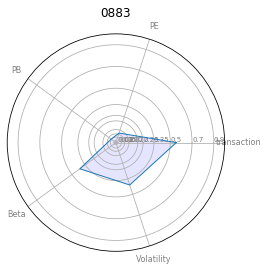

In [21]:
draw_radar(26)